## 1. Import All Dependencies

In [9]:
import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from catboost import CatBoostRegressor
from scipy import stats
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.ensemble import (
    GradientBoostingRegressor,
    RandomForestRegressor,
    StackingRegressor,
    VotingRegressor,
)
from sklearn.impute import SimpleImputer
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from xgboost import XGBRegressor

## 2. Load the Dataset

In [10]:
train_df = pd.read_csv(
    "/home/kobey/Documents/DATASCIENCE/PROJECTS/HOUSE PRICES - ADVANCED REGRESSION TECHNIQUES/data/01-raw/train.csv"
)
test_df = pd.read_csv(
    "/home/kobey/Documents/DATASCIENCE/PROJECTS/HOUSE PRICES - ADVANCED REGRESSION TECHNIQUES/data/01-raw/test.csv"
)

In [11]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [12]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [13]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<Axes: >

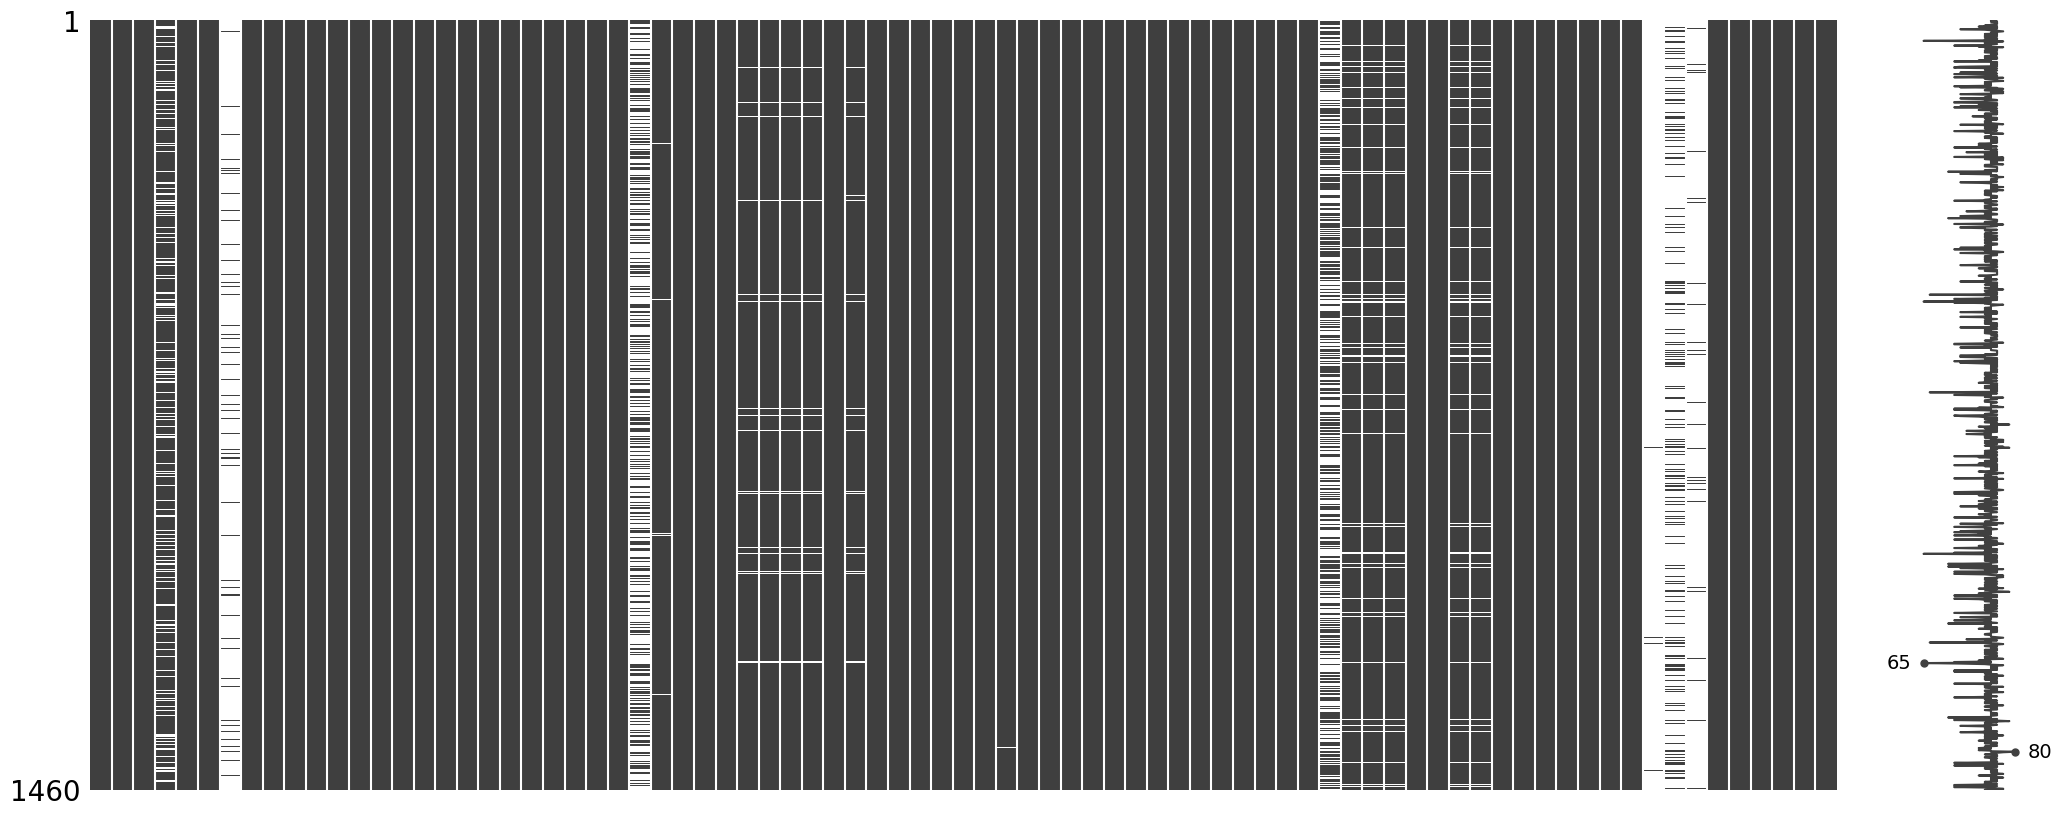

In [14]:
import missingno as msno

msno.matrix(train_df)

## 3. Initial Data Exploration

In [15]:
train_df.dtypes[train_df.dtypes != "object"]

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

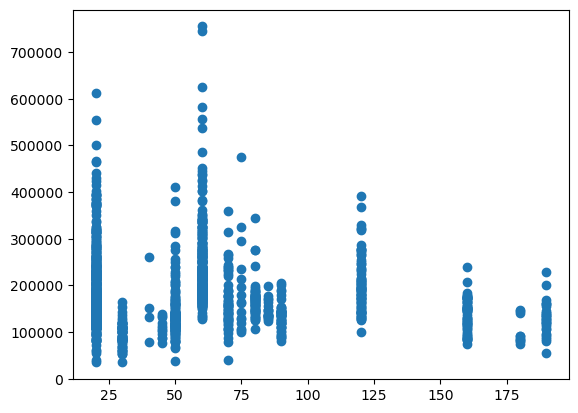

In [16]:
plt.scatter(x="MSSubClass", y="SalePrice", data=train_df)

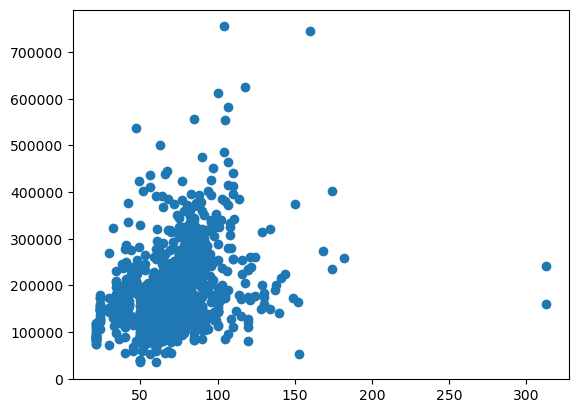

In [17]:
plt.scatter(x="LotFrontage", y="SalePrice", data=train_df)

In [18]:
train_df.query("LotFrontage > 300")
# Drop 935 1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


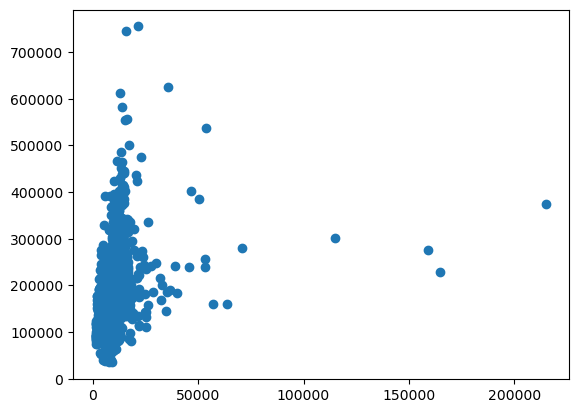

In [19]:
plt.scatter(x="LotArea", y="SalePrice", data=train_df)

In [20]:
train_df.query("LotArea > 65000")
# Drop 250, 314, 336, 707
# maybe 1397

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
451,452,20,RL,62.0,70761,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,280000
706,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000


In [21]:
z = pd.Series(stats.zscore(train_df["LotArea"]))
z.sort_values().tail(10)

384      4.268474
457      4.280500
769      4.308262
1396     4.678682
1298     5.348867
451      6.037793
706     10.486449
249     14.881285
335     15.448542
313     20.518273
dtype: float64

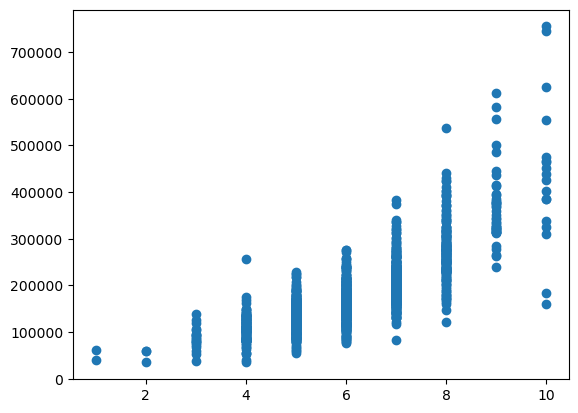

In [22]:
plt.scatter(x="OverallQual", y="SalePrice", data=train_df)

In [23]:
train_df.query("OverallQual == 10")
# drop 524

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,438780
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
224,225,20,RL,103.0,13472,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,386250
389,390,60,RL,96.0,12474,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,New,Partial,426000
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
515,516,20,RL,94.0,12220,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,New,Partial,402861
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000
591,592,60,RL,97.0,13478,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,ConLI,Normal,451950
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


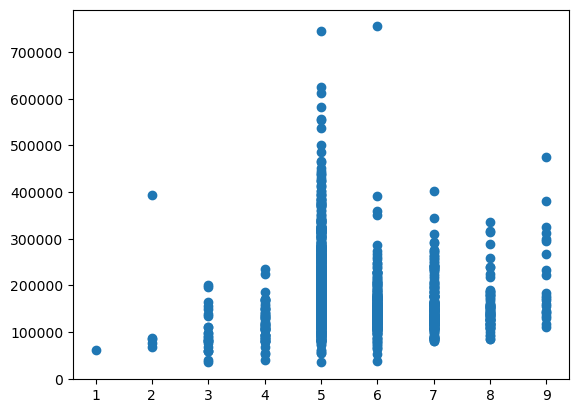

In [24]:
plt.scatter(x="OverallCond", y="SalePrice", data=train_df)

In [25]:
train_df.query("OverallCond == 5 & SalePrice > 700000")
# Drop 1182

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [26]:
train_df.query("OverallCond == 6 & SalePrice > 700000")
# Drop 692

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


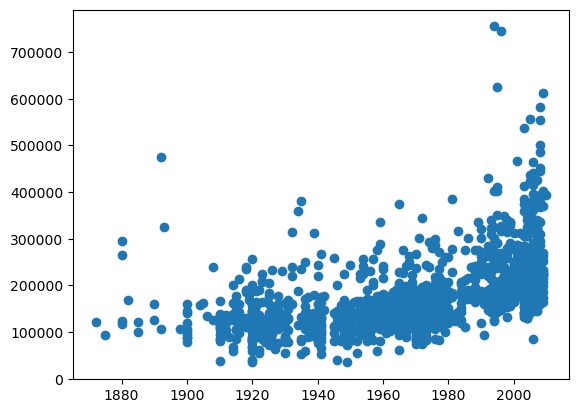

In [27]:
plt.scatter(x="YearBuilt", y="SalePrice", data=train_df)

In [28]:
train_df.query("YearBuilt < 1900 & SalePrice > 400000")
# Drop 186

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000


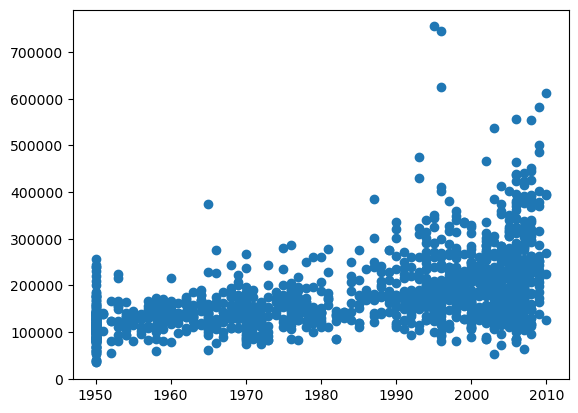

In [29]:
plt.scatter(x="YearRemodAdd", y="SalePrice", data=train_df)

In [30]:
train_df.query("YearRemodAdd < 1970 & SalePrice > 300000")
# Drop 314

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000


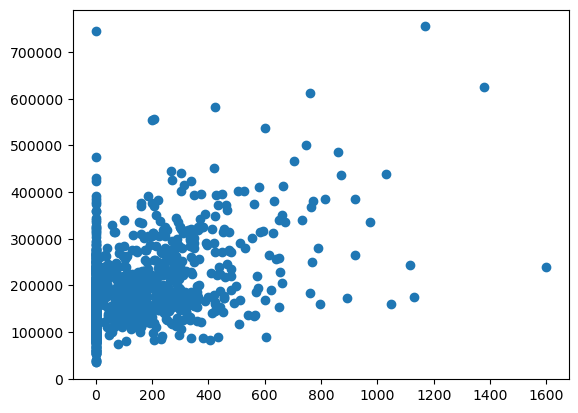

In [31]:
plt.scatter(x="MasVnrArea", y="SalePrice", data=train_df)

In [32]:
train_df.query("MasVnrArea > 1500")
# Drop 298

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
297,298,60,FV,66.0,7399,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,239000


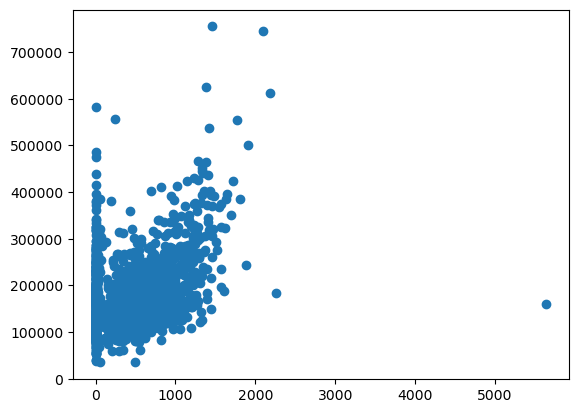

In [33]:
plt.scatter(x="BsmtFinSF1", y="SalePrice", data=train_df)

In [34]:
train_df.query("BsmtFinSF1 > 5000")
# Drop 1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


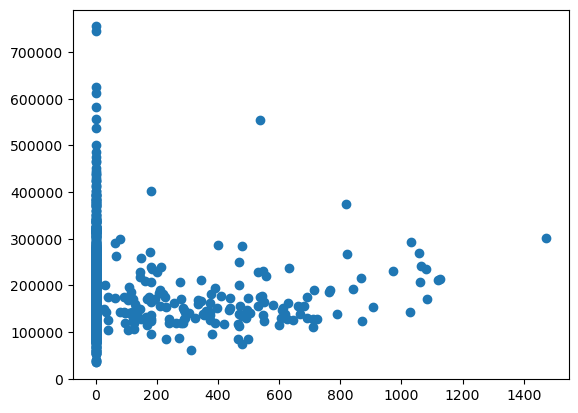

In [35]:
plt.scatter(x="BsmtFinSF2", y="SalePrice", data=train_df)

In [36]:
train_df.query("BsmtFinSF2 > 400 & SalePrice > 500000")
# Drop 441

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000


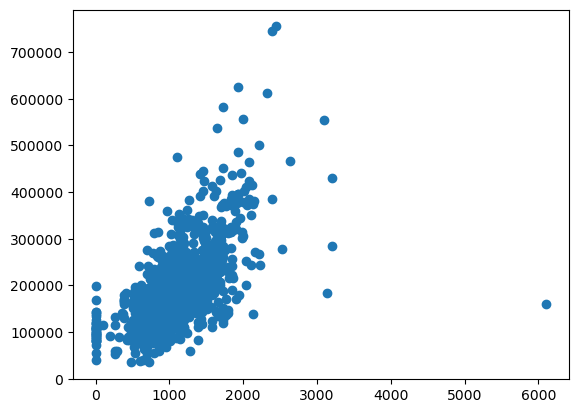

In [37]:
plt.scatter(x="TotalBsmtSF", y="SalePrice", data=train_df)

In [38]:
train_df.query("TotalBsmtSF > 5000")
# Drop 1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


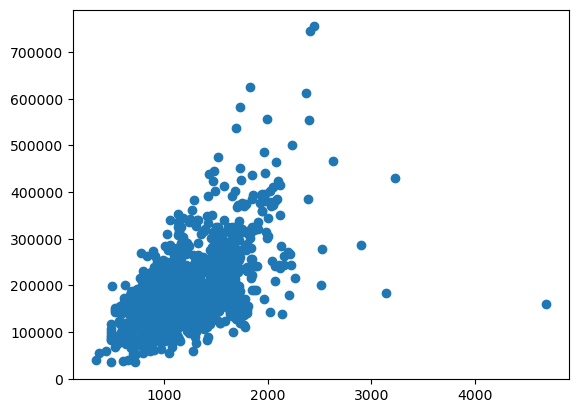

In [39]:
plt.scatter(x="1stFlrSF", y="SalePrice", data=train_df)

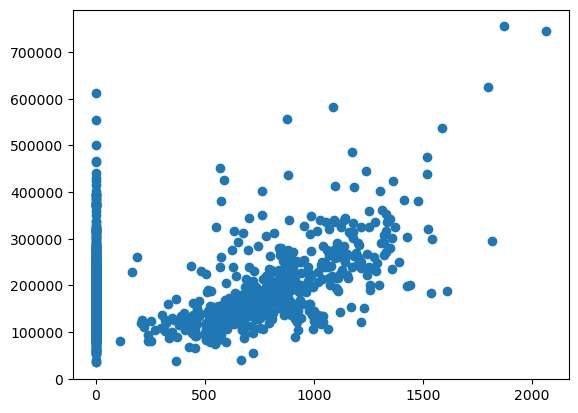

In [40]:
plt.scatter(x="2ndFlrSF", y="SalePrice", data=train_df)

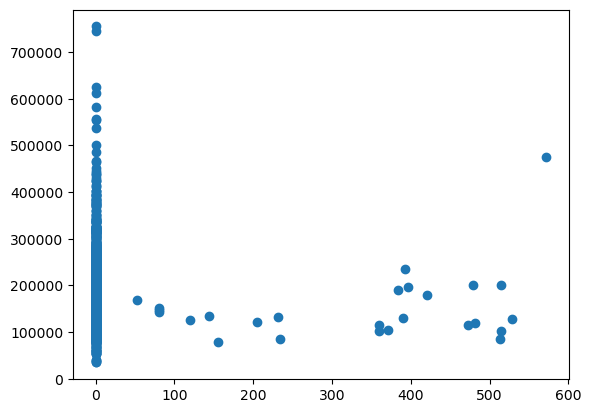

In [41]:
plt.scatter(x="LowQualFinSF", y="SalePrice", data=train_df)

In [42]:
train_df.query("LowQualFinSF > 550")
# Drop 186

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000


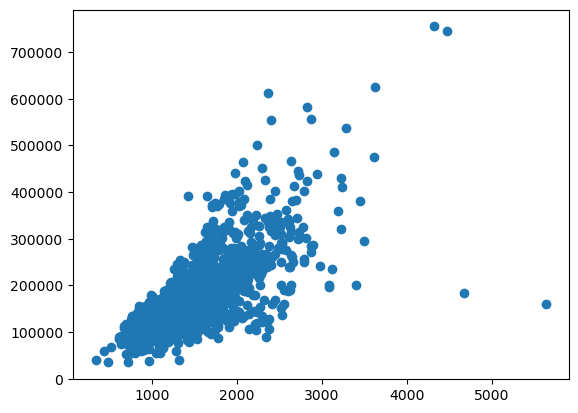

In [43]:
plt.scatter(x="GrLivArea", y="SalePrice", data=train_df)

In [44]:
train_df.query("GrLivArea > 4000")
# Drop 524 1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


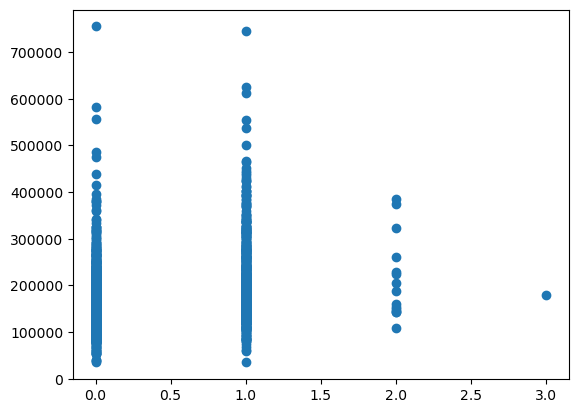

In [45]:
plt.scatter(x="BsmtFullBath", y="SalePrice", data=train_df)

In [46]:
train_df.query("BsmtFullBath > 2.5")
# Drop 739

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
738,739,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000


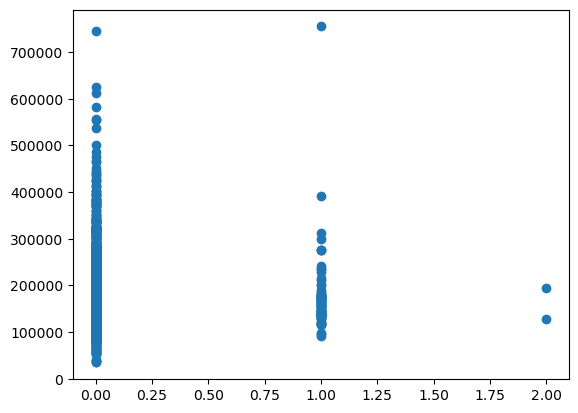

In [47]:
plt.scatter(x="BsmtHalfBath", y="SalePrice", data=train_df)

In [48]:
np.unique(stats.zscore(train_df["BsmtHalfBath"]))

array([-0.24106104,  3.94880935,  8.13867973])

In [49]:
train_df.query("BsmtHalfBath == 2")
# Drop 598 955

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
597,598,120,RL,53.0,3922,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,New,Partial,194201
954,955,90,RL,35.0,9400,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,AdjLand,127500


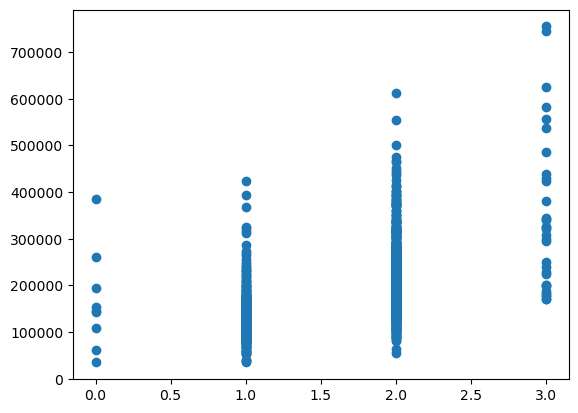

In [50]:
plt.scatter(x="FullBath", y="SalePrice", data=train_df)

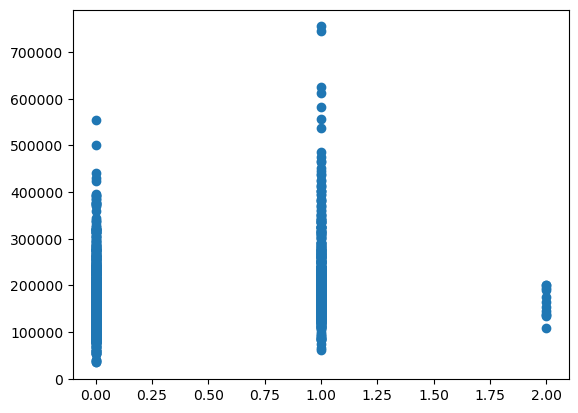

In [51]:
plt.scatter(x="HalfBath", y="SalePrice", data=train_df)

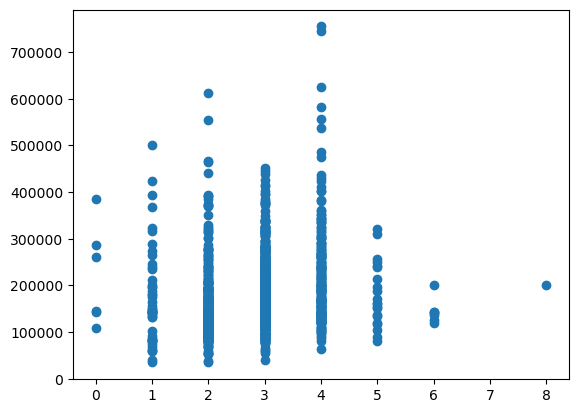

In [52]:
plt.scatter(x="BedroomAbvGr", y="SalePrice", data=train_df)

In [53]:
train_df.query("BedroomAbvGr == 8")
# Drop 636

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000


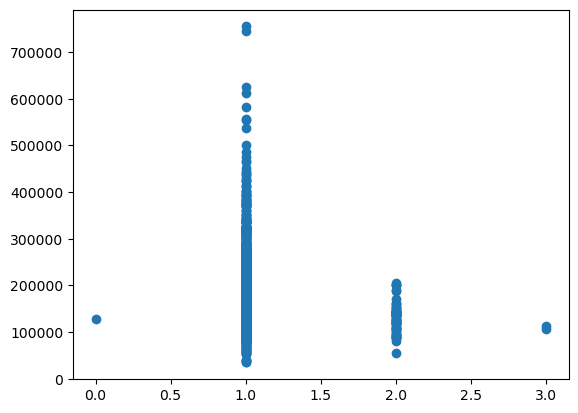

In [54]:
plt.scatter(x="KitchenAbvGr", y="SalePrice", data=train_df)

In [55]:
train_df.query("KitchenAbvGr == 3")
# Drop  49 810

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
48,49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
809,810,75,RM,90.0,8100,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,11,2009,WD,Normal,106000


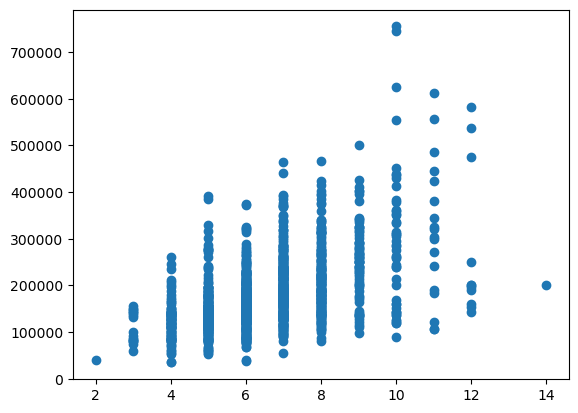

In [56]:
plt.scatter(x="TotRmsAbvGrd", y="SalePrice", data=train_df)

In [57]:
train_df.query("TotRmsAbvGrd == 14")
# Drop 636

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000


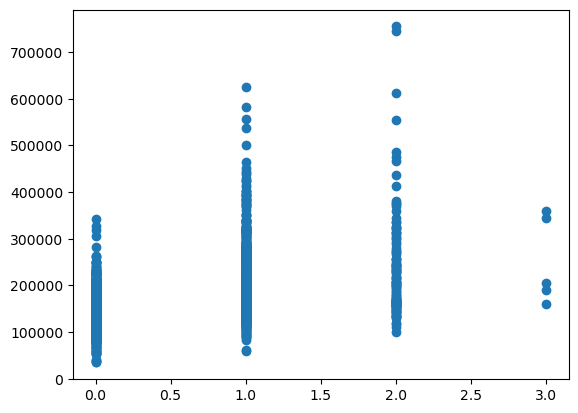

In [58]:
plt.scatter(x="Fireplaces", y="SalePrice", data=train_df)

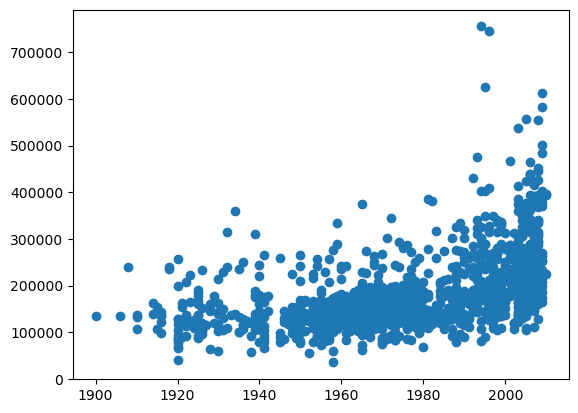

In [59]:
plt.scatter(x="GarageYrBlt", y="SalePrice", data=train_df)

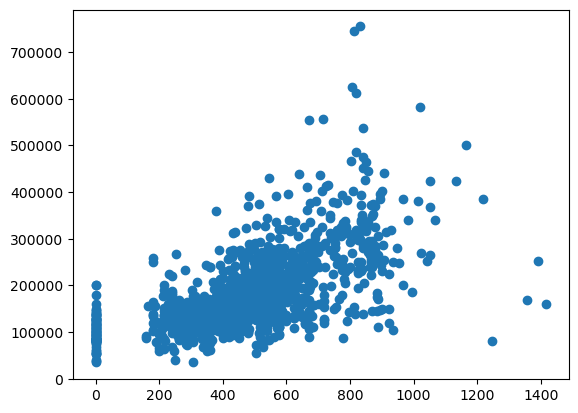

In [60]:
plt.scatter(x="GarageArea", y="SalePrice", data=train_df)

In [61]:
train_df.query("GarageArea > 1200")
# Drop 1062, 1191

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
581,582,20,RL,98.0,12704,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,New,Partial,253293
825,826,20,RL,114.0,14803,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,New,Partial,385000
1061,1062,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,...,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000
1190,1191,190,RL,NaN,32463,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,168000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


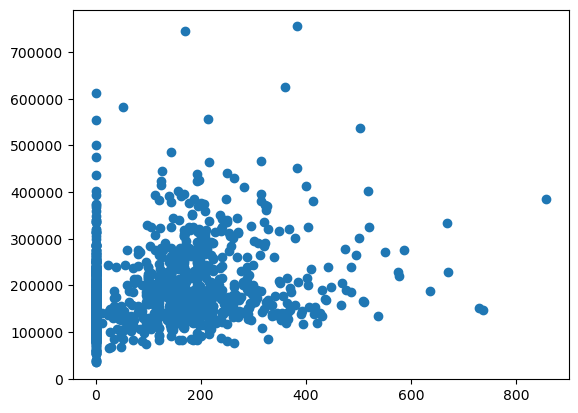

In [62]:
plt.scatter(x="WoodDeckSF", y="SalePrice", data=train_df)

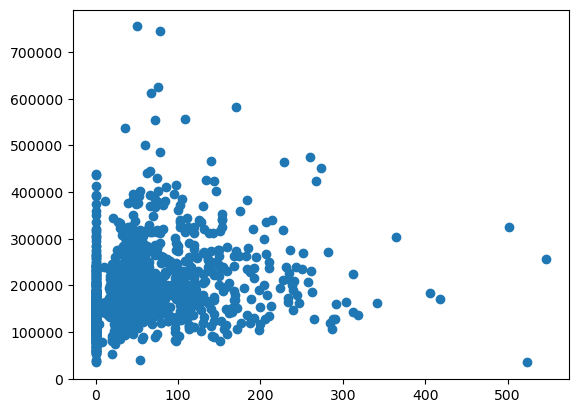

In [63]:
plt.scatter(x="OpenPorchSF", y="SalePrice", data=train_df)

In [64]:
train_df.query("OpenPorchSF > 500")
# Drop 496

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
495,496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000
1328,1329,50,RM,60.0,10440,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,1150,6,2008,WD,Normal,256000


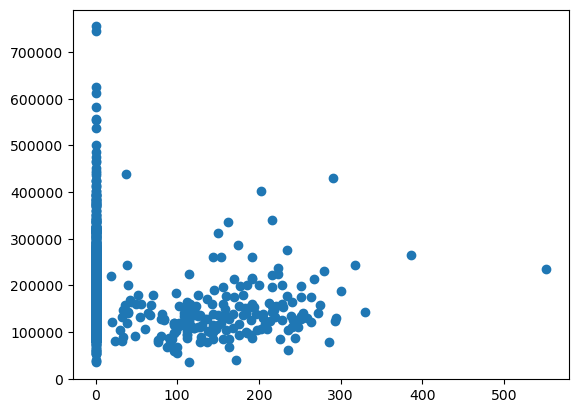

In [65]:
plt.scatter(x="EnclosedPorch", y="SalePrice", data=train_df)

In [66]:
train_df.query("EnclosedPorch > 500")
# Drop 198

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000


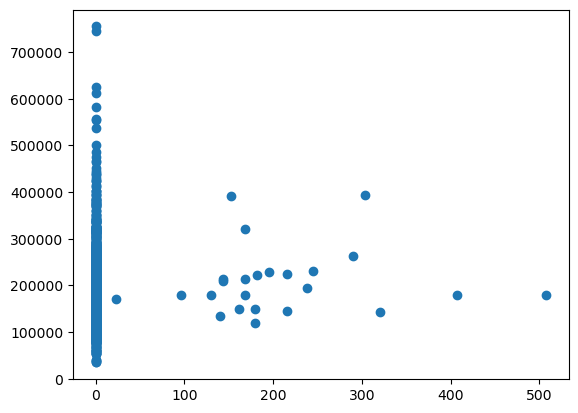

In [67]:
plt.scatter(x="3SsnPorch", y="SalePrice", data=train_df)

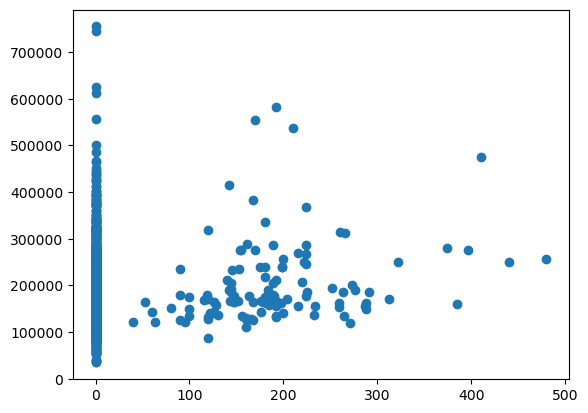

In [68]:
plt.scatter(x="ScreenPorch", y="SalePrice", data=train_df)

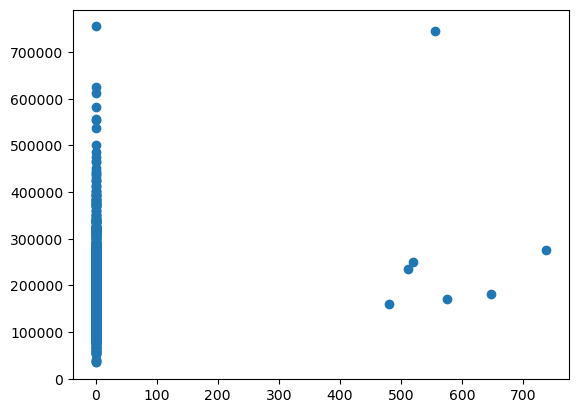

In [69]:
plt.scatter(x="PoolArea", y="SalePrice", data=train_df)

In [70]:
values = [
    598,
    955,
    935,
    1299,
    250,
    314,
    336,
    707,
    379,
    1183,
    692,
    186,
    441,
    186,
    524,
    739,
    598,
    955,
    636,
    1062,
    1191,
    496,
    198,
    1338,
]

In [71]:
train_df = train_df[train_df.Id.isin(values) == False]

In [72]:
pd.DataFrame(train_df.isnull().sum().sort_values(ascending=False)).head(20)

,0
PoolQC,1435
MiscFeature,1388
Alley,1350
Fence,1162
MasVnrType,861
FireplaceQu,684
LotFrontage,255
GarageQual,76
GarageFinish,76
GarageType,76


In [73]:
train_df["MiscFeature"].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [74]:
train_df["Alley"].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

## 4. Missing Values Imputation

In [75]:
train_df["Alley"].fillna("No", inplace=True)
test_df["Alley"].fillna("No", inplace=True)

/tmp/ipykernel_99264/2277165759.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Alley'].fillna('No', inplace=True)
/tmp/ipykernel_99264/2277165759.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Alley'].fillna('No', inplace=True)
/tmp/ipykernel_99264/2277165759.py:2: FutureWarning: A value is trying to be set on a c

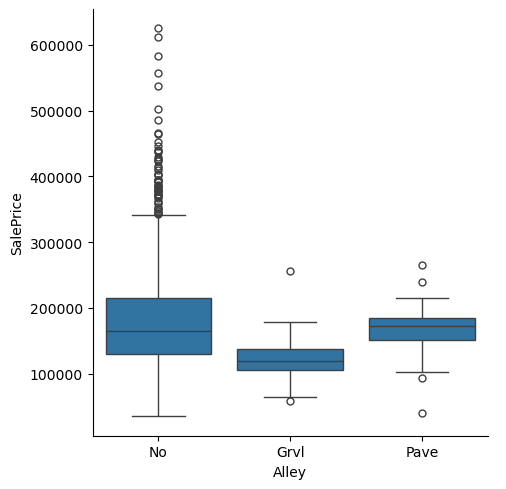

In [76]:
sns.catplot(data=train_df, x="Alley", y="SalePrice", kind="box")

In [77]:
train_df["Fence"].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [78]:
train_df["Fence"].fillna("No", inplace=True)
test_df["Fence"].fillna("No", inplace=True)

/tmp/ipykernel_99264/3730986352.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Fence'].fillna('No', inplace=True)
/tmp/ipykernel_99264/3730986352.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Fence'].fillna('No', inplace=True)
/tmp/ipykernel_99264/3730986352.py:2: FutureWarning: A value is trying to be set on a c

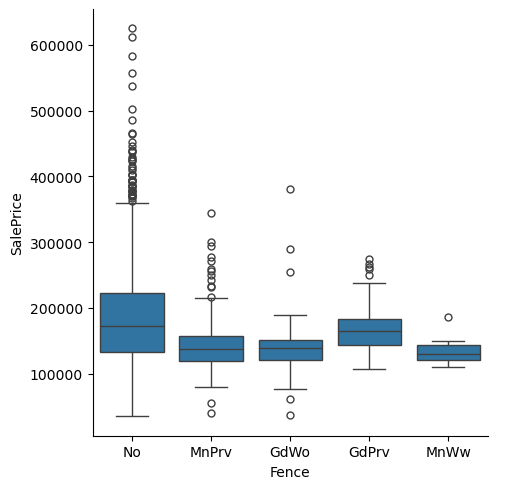

In [79]:
sns.catplot(data=train_df, x="Fence", y="SalePrice", kind="box")

In [80]:
train_df["MasVnrType"].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [81]:
train_df["MasVnrType"].fillna("No", inplace=True)
test_df["MasVnrType"].fillna("No", inplace=True)

/tmp/ipykernel_99264/2175816292.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['MasVnrType'].fillna('No', inplace=True)
/tmp/ipykernel_99264/2175816292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['MasVnrType'].fillna('No', inplace=True)
/tmp/ipykernel_99264/2175816292.py:2: FutureWarning: A value is trying to be 

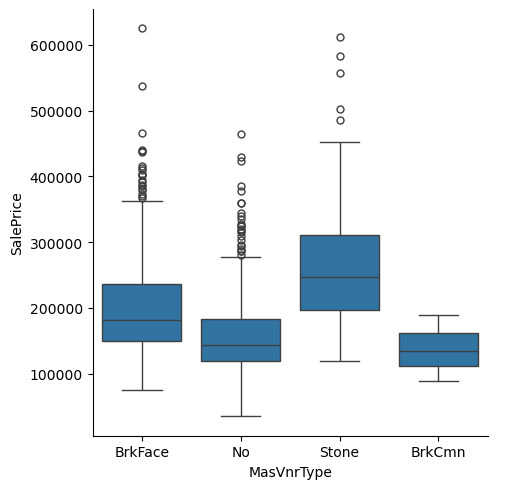

In [82]:
sns.catplot(data=train_df, x="MasVnrType", y="SalePrice", kind="box")

In [83]:
train_df["FireplaceQu"].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [84]:
train_df["FireplaceQu"].fillna("No", inplace=True)
test_df["FireplaceQu"].fillna("No", inplace=True)

/tmp/ipykernel_99264/2825947256.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['FireplaceQu'].fillna('No', inplace=True)
/tmp/ipykernel_99264/2825947256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['FireplaceQu'].fillna('No', inplace=True)
/tmp/ipykernel_99264/2825947256.py:2: FutureWarning: A value is trying to b

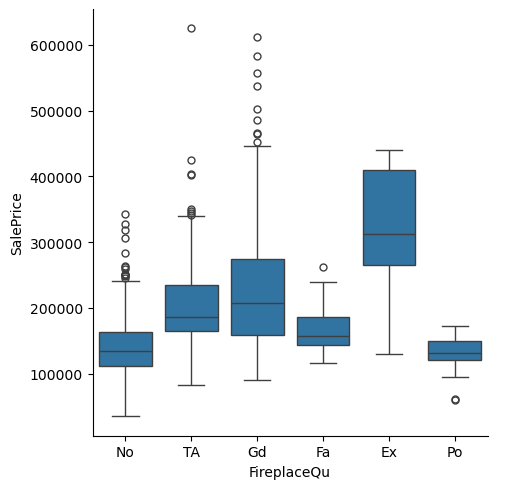

In [85]:
sns.catplot(data=train_df, x="FireplaceQu", y="SalePrice", kind="box")

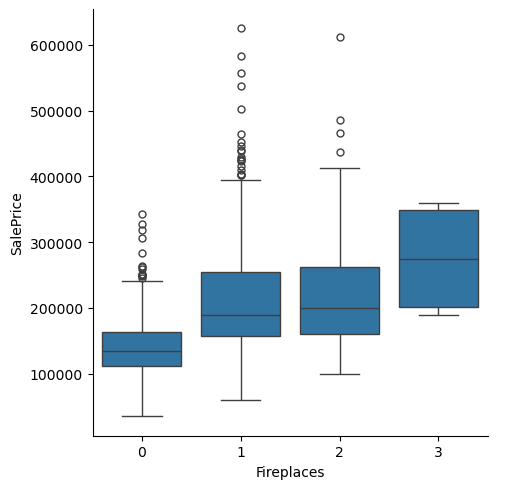

In [86]:
sns.catplot(data=train_df, x="Fireplaces", y="SalePrice", kind="box")

In [87]:
train_df["LotFrontage"].fillna(0, inplace=True)
test_df["LotFrontage"].fillna(0, inplace=True)

/tmp/ipykernel_99264/1334701034.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['LotFrontage'].fillna(0, inplace=True)
/tmp/ipykernel_99264/1334701034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['LotFrontage'].fillna(0, inplace=True)
/tmp/ipykernel_99264/1334701034.py:2: FutureWarning: A value is trying to be set 

In [88]:
train_df["GarageYrBlt"].corr(train_df["YearBuilt"])

np.float64(0.828982759506057)

In [89]:
train_df["GarageCond"].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [90]:
train_df["GarageCond"].fillna("No", inplace=True)
test_df["GarageCond"].fillna("No", inplace=True)

/tmp/ipykernel_99264/1255948083.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['GarageCond'].fillna('No', inplace=True)
/tmp/ipykernel_99264/1255948083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['GarageCond'].fillna('No', inplace=True)
/tmp/ipykernel_99264/1255948083.py:2: FutureWarning: A value is trying to be 

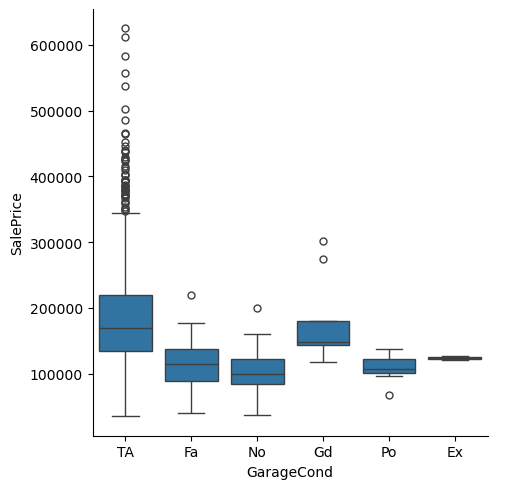

In [91]:
sns.catplot(data=train_df, x="GarageCond", y="SalePrice", kind="box")

In [92]:
train_df["GarageType"].fillna("No", inplace=True)
test_df["GarageType"].fillna("No", inplace=True)

/tmp/ipykernel_99264/3721453499.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['GarageType'].fillna('No', inplace=True)
/tmp/ipykernel_99264/3721453499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['GarageType'].fillna('No', inplace=True)
/tmp/ipykernel_99264/3721453499.py:2: FutureWarning: A value is trying to be 

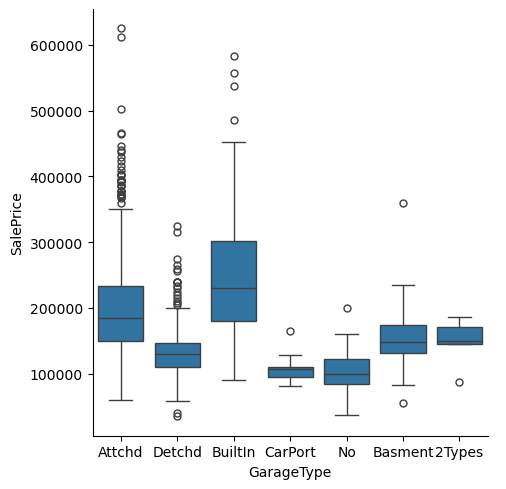

In [93]:
sns.catplot(data=train_df, x="GarageType", y="SalePrice", kind="box")

In [94]:
train_df["GarageFinish"].fillna("No", inplace=True)
test_df["GarageFinish"].fillna("No", inplace=True)

/tmp/ipykernel_99264/2912414829.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['GarageFinish'].fillna('No', inplace=True)
/tmp/ipykernel_99264/2912414829.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['GarageFinish'].fillna('No', inplace=True)
/tmp/ipykernel_99264/2912414829.py:2: FutureWarning: A value is trying to

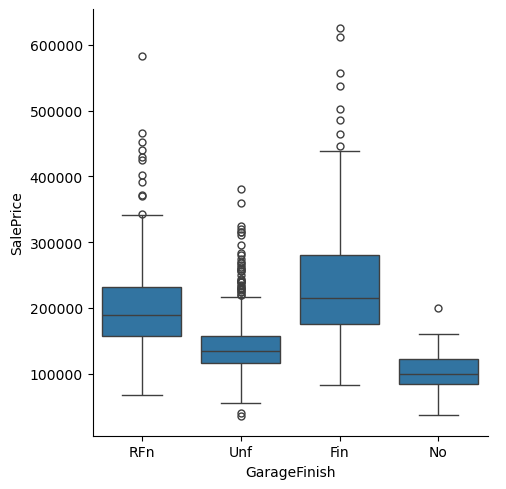

In [95]:
sns.catplot(data=train_df, x="GarageFinish", y="SalePrice", kind="box")

In [96]:
train_df["GarageQual"].fillna("No", inplace=True)
test_df["GarageQual"].fillna("No", inplace=True)

/tmp/ipykernel_99264/94532614.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['GarageQual'].fillna('No', inplace=True)
/tmp/ipykernel_99264/94532614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['GarageQual'].fillna('No', inplace=True)
/tmp/ipykernel_99264/94532614.py:2: FutureWarning: A value is trying to be set on

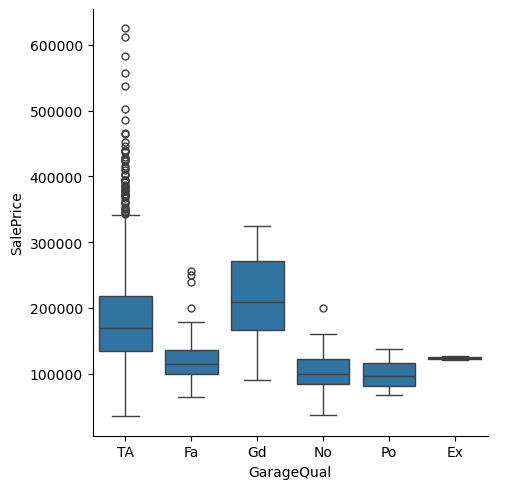

In [97]:
sns.catplot(data=train_df, x="GarageQual", y="SalePrice", kind="box")

In [98]:
train_df["BsmtFinType2"].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [99]:
train_df["BsmtFinType2"].fillna("Unf", inplace=True)
test_df["BsmtFinType2"].fillna("Unf", inplace=True)

/tmp/ipykernel_99264/1071294587.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['BsmtFinType2'].fillna('Unf', inplace=True)
/tmp/ipykernel_99264/1071294587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['BsmtFinType2'].fillna('Unf', inplace=True)
/tmp/ipykernel_99264/1071294587.py:2: FutureWarning: A value is trying 

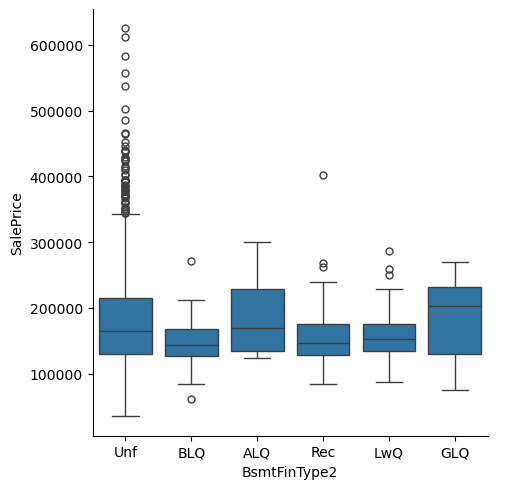

In [100]:
sns.catplot(data=train_df, x="BsmtFinType2", y="SalePrice", kind="box")

In [101]:
train_df["BsmtExposure"].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [102]:
train_df["BsmtExposure"].fillna("No", inplace=True)
test_df["BsmtExposure"].fillna("No", inplace=True)

/tmp/ipykernel_99264/2040818772.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['BsmtExposure'].fillna('No', inplace=True)
/tmp/ipykernel_99264/2040818772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['BsmtExposure'].fillna('No', inplace=True)
/tmp/ipykernel_99264/2040818772.py:2: FutureWarning: A value is trying to

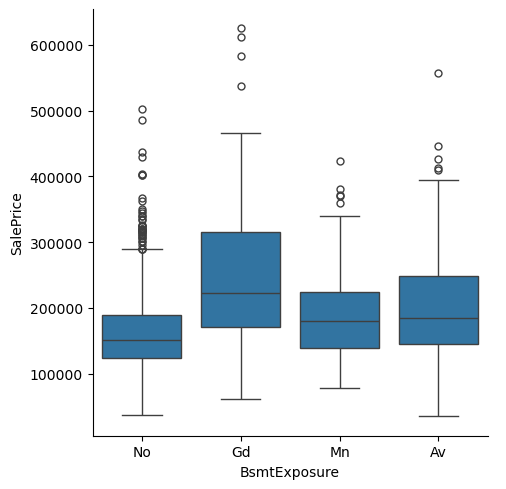

In [103]:
sns.catplot(data=train_df, x="BsmtExposure", y="SalePrice", kind="box")

In [104]:
train_df["BsmtQual"].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [105]:
train_df["BsmtQual"].fillna("No", inplace=True)
test_df["BsmtQual"].fillna("No", inplace=True)

/tmp/ipykernel_99264/2878576625.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['BsmtQual'].fillna('No', inplace=True)
/tmp/ipykernel_99264/2878576625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['BsmtQual'].fillna('No', inplace=True)
/tmp/ipykernel_99264/2878576625.py:2: FutureWarning: A value is trying to be set 

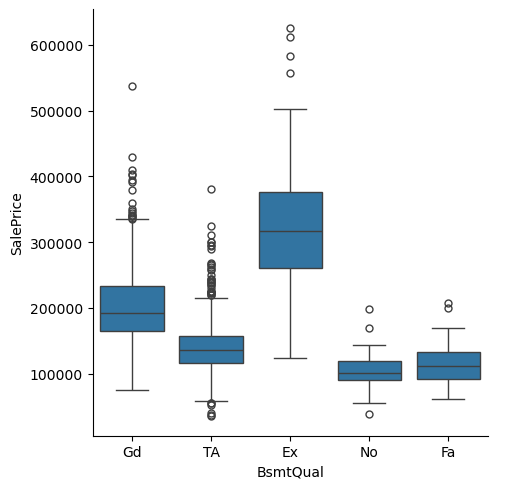

In [106]:
sns.catplot(data=train_df, x="BsmtQual", y="SalePrice", kind="box")

In [107]:
train_df["BsmtCond"].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [108]:
train_df["BsmtCond"].fillna("No", inplace=True)
test_df["BsmtCond"].fillna("No", inplace=True)

/tmp/ipykernel_99264/2806626140.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['BsmtCond'].fillna('No', inplace=True)
/tmp/ipykernel_99264/2806626140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['BsmtCond'].fillna('No', inplace=True)
/tmp/ipykernel_99264/2806626140.py:2: FutureWarning: A value is trying to be set 

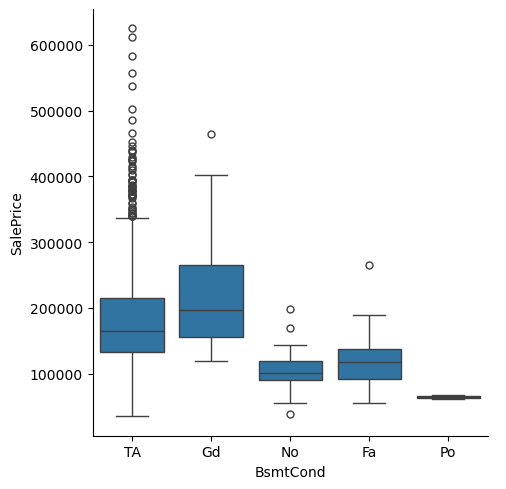

In [109]:
sns.catplot(data=train_df, x="BsmtCond", y="SalePrice", kind="box")

In [110]:
train_df["BsmtFinType1"].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [111]:
train_df["BsmtFinType1"].fillna("Unf", inplace=True)
test_df["BsmtFinType1"].fillna("Unf", inplace=True)

/tmp/ipykernel_99264/3531540711.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['BsmtFinType1'].fillna('Unf', inplace=True)
/tmp/ipykernel_99264/3531540711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['BsmtFinType1'].fillna('Unf', inplace=True)
/tmp/ipykernel_99264/3531540711.py:2: FutureWarning: A value is trying 

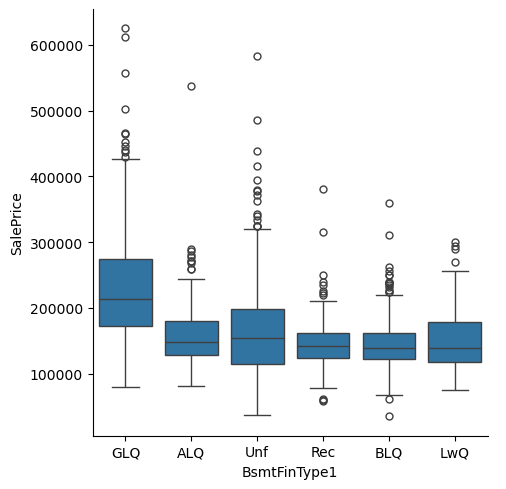

In [112]:
sns.catplot(data=train_df, x="BsmtFinType1", y="SalePrice", kind="box")

In [113]:
train_df["MasVnrArea"].fillna(0, inplace=True)
test_df["MasVnrArea"].fillna(0, inplace=True)

/tmp/ipykernel_99264/3657060107.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['MasVnrArea'].fillna(0, inplace=True)
/tmp/ipykernel_99264/3657060107.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['MasVnrArea'].fillna(0, inplace=True)
/tmp/ipykernel_99264/3657060107.py:2: FutureWarning: A value is trying to be set on

In [114]:
train_df["Electrical"].fillna("SBrkr", inplace=True)
test_df["Electrical"].fillna("SBrkr", inplace=True)

/tmp/ipykernel_99264/4245203846.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Electrical'].fillna('SBrkr', inplace=True)
/tmp/ipykernel_99264/4245203846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Electrical'].fillna('SBrkr', inplace=True)
/tmp/ipykernel_99264/4245203846.py:2: FutureWarning: A value is trying 

In [115]:
## 5. Outlier Summary Statistics

## 6. Target Variable Distribution Analysis

In [116]:
# Top features correlated with SalePrice
numeric_cols = train_df.select_dtypes(include=["int64", "float64"]).columns
correlations = (
    train_df[list(numeric_cols)].corrwith(train_df["SalePrice"]).sort_values(ascending=False)
)
print("Top 10 Features Correlated with SalePrice:")
print(correlations.head(10))
print("\nBottom 10 Features Correlated with SalePrice:")
print(correlations.tail(10))

Top 10 Features Correlated with SalePrice:
SalePrice       1.000000
OverallQual     0.800050
GrLivArea       0.721056
GarageCars      0.656342
GarageArea      0.651169
TotalBsmtSF     0.640510
1stFlrSF        0.617480
FullBath        0.567540
YearBuilt       0.550795
TotRmsAbvGrd    0.533332
dtype: float64

Bottom 10 Features Correlated with SalePrice:
Id              -0.014928
MiscVal         -0.021291
YrSold          -0.027605
BsmtFinSF2      -0.028214
BsmtHalfBath    -0.040759
LowQualFinSF    -0.070674
OverallCond     -0.087392
MSSubClass      -0.088598
EnclosedPorch   -0.135193
KitchenAbvGr    -0.145217
dtype: float64


## 7. Numeric Features Analysis

In [117]:
# Distribution of categorical variables
categorical_cols = train_df.select_dtypes(include=["object"]).columns
print(f"Number of categorical features: {len(categorical_cols)}")
print(f"Categorical columns: {list(categorical_cols)}")

Number of categorical features: 43
Categorical columns: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [118]:
# Key statistics on SalePrice
print("SalePrice Statistics:")
print(train_df["SalePrice"].describe())
print(f"\nSkewness: {train_df['SalePrice'].skew():.4f}")
print(f"Kurtosis: {train_df['SalePrice'].kurtosis():.4f}")

SalePrice Statistics:
count      1439.000000
mean     179415.366921
std       75341.399716
min       35311.000000
25%      129900.000000
50%      162000.000000
75%      213125.000000
max      625000.000000
Name: SalePrice, dtype: float64

Skewness: 1.5502
Kurtosis: 3.8490


### Summary of Key Findings:

1. **Target Variable**: SalePrice has a right-skewed distribution - log transformation recommended
2. **Missing Values**: Already handled; categorical NAs filled with 'No', numeric with appropriate defaults
3. **Outliers**: 24 outlier rows removed based on univariate analysis
4. **Data Quality**: No duplicates found; balanced mix of numeric and categorical features
5. **Feature Relationships**: Several features show strong correlation with SalePrice
6. **Multicollinearity**: Some features (e.g., GarageArea vs GarageCars) highly correlated - consider dropping
7. **Categorical Features**: Neighborhood and BldgType show strong relationship with price variations

### Recommendations for Baseline Model:
- ✅ Use log-transformed SalePrice as target
- ✅ Drop high VIF features or use regularization
- ✅ Implement proper preprocessing pipeline with scaling and encoding
- ✅ Consider interaction features (e.g., TotalArea × Quality)
- ✅ Use ensemble methods for better generalization

## 12. Key Insights and Recommendations

In [120]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for numeric columns
numeric_data = train_df.select_dtypes(include=["int64", "float64"]).drop("SalePrice", axis=1)

# Sample if too many columns
if numeric_data.shape[1] > 20:
    numeric_data = numeric_data.iloc[:, :20]

vif_data = pd.DataFrame()
vif_data["Feature"] = numeric_data.columns
vif_data["VIF"] = [
    variance_inflation_factor(numeric_data.values, i) for i in range(numeric_data.shape[1])
]
vif_data = vif_data.sort_values("VIF", ascending=False)

print("Variance Inflation Factor (VIF) - Top 15:")
print(vif_data.head(15))
print("\nNote: VIF > 10 indicates high multicollinearity")

Variance Inflation Factor (VIF) - Top 15:
         Feature           VIF
16     GrLivArea           inf
9     BsmtFinSF1           inf
11     BsmtUnfSF           inf
10    BsmtFinSF2           inf
15  LowQualFinSF           inf
14      2ndFlrSF           inf
13      1stFlrSF           inf
12   TotalBsmtSF           inf
7   YearRemodAdd  1.167156e+04
6      YearBuilt  1.111110e+04
4    OverallQual  4.749021e+01
5    OverallCond  4.015874e+01
19      FullBath  1.929861e+01
3        LotArea  6.078209e+00
2    LotFrontage  4.456534e+00

Note: VIF > 10 indicates high multicollinearity


/home/kobey/anaconda3/envs/califonia_housing_prices/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


## 11. Multicollinearity Analysis (VIF)

In [121]:
# IQR method for outlier detection on numeric columns
numeric_cols = train_df.select_dtypes(include=["int64", "float64"]).columns
outlier_counts = {}

for col in numeric_cols:
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = train_df[(train_df[col] < lower_bound) | (train_df[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

# Top 10 columns with outliers
outlier_df = pd.DataFrame(
    list(outlier_counts.items()), columns=["Column", "Outlier_Count"]
).sort_values("Outlier_Count", ascending=False)
print("Top 10 columns with most outliers (IQR method):")
print(outlier_df.head(10))

Top 10 columns with most outliers (IQR method):
           Column  Outlier_Count
30  EnclosedPorch            206
10     BsmtFinSF2            163
5     OverallCond            123
32    ScreenPorch            114
1      MSSubClass            100
8      MasVnrArea             96
18   BsmtHalfBath             77
29    OpenPorchSF             73
22   KitchenAbvGr             66
3         LotArea             62


## 10. IQR-Based Outlier Detection

In [122]:
# Comprehensive data quality report
print("DATA QUALITY REPORT")
print("=" * 60)
print(f"Total rows: {len(train_df)}")
print(f"Total columns: {len(train_df.columns)}")
print(f"\nMissing values:")
missing = train_df.isnull().sum()
if missing.sum() > 0:
    print(missing[missing > 0])
else:
    print("No missing values!")

print(f"\nDuplicate rows: {train_df.duplicated().sum()}")

print(f"\nData types distribution:")
print(train_df.dtypes.value_counts())

print(f"\nNumeric columns: {len(train_df.select_dtypes(include=['int64', 'float64']).columns)}")
print(f"Categorical columns: {len(train_df.select_dtypes(include=['object']).columns)}")

DATA QUALITY REPORT
Total rows: 1439
Total columns: 81

Missing values:
GarageYrBlt      76
PoolQC         1435
MiscFeature    1388
dtype: int64

Duplicate rows: 0

Data types distribution:
object     43
int64      35
float64     3
Name: count, dtype: int64

Numeric columns: 38
Categorical columns: 43


## 9. Data Quality Report

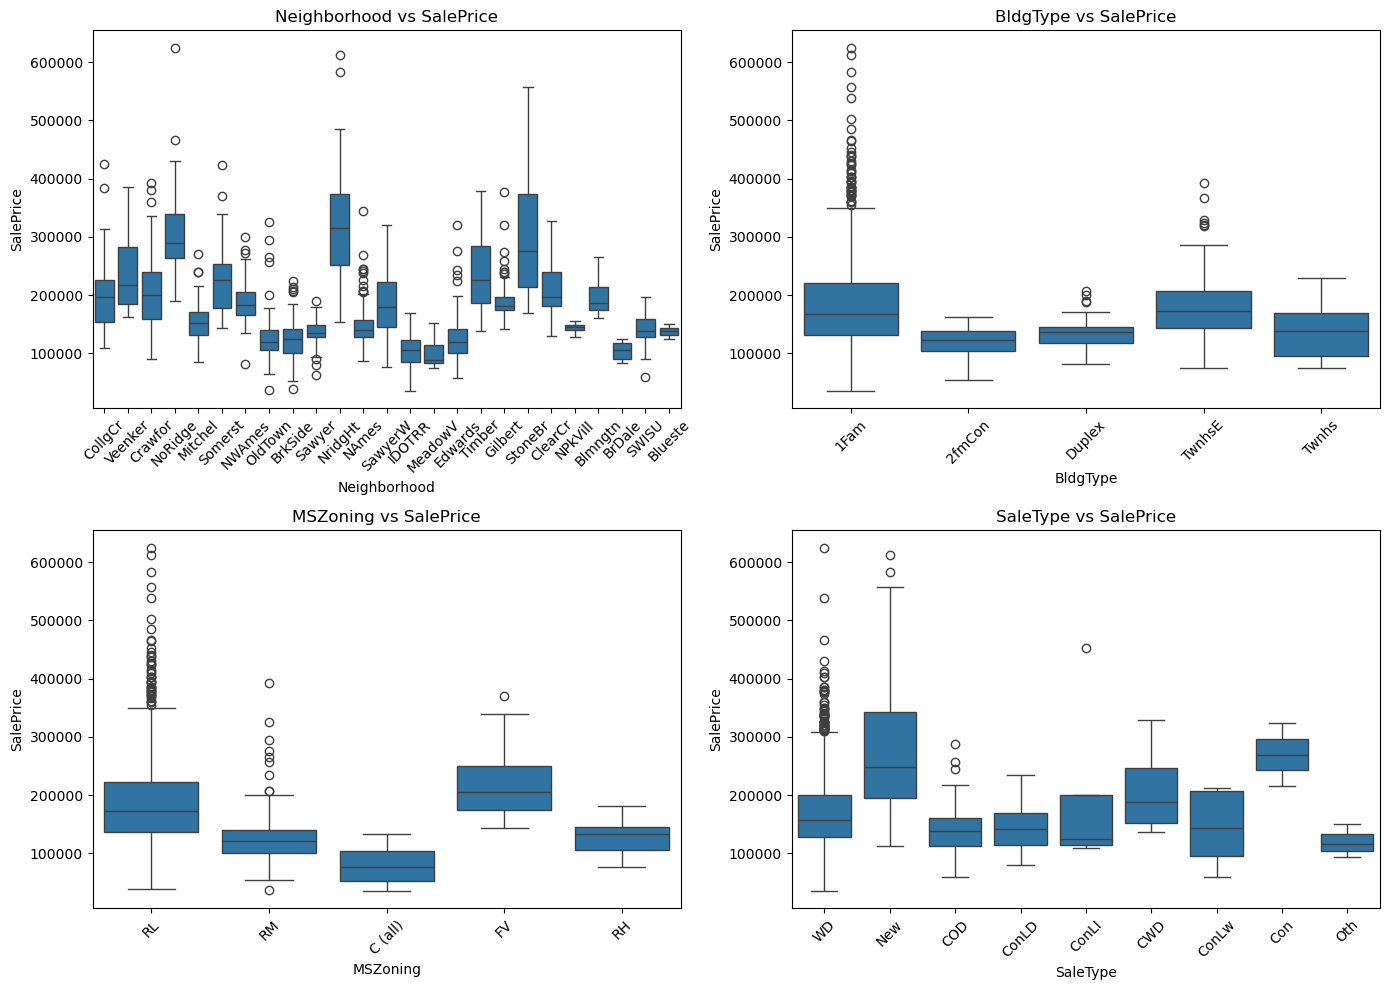

In [123]:
# Box plots for top categorical features vs SalePrice
top_cats = ["Neighborhood", "BldgType", "MSZoning", "SaleType"]
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
for idx, col in enumerate(top_cats):
    ax = axes[idx // 2, idx % 2]
    sns.boxplot(data=train_df, x=col, y="SalePrice", ax=ax)
    ax.set_title(f"{col} vs SalePrice")
    ax.tick_params(axis="x", rotation=45)
plt.tight_layout()
plt.show()

## 8. Categorical Features Analysis

In [124]:
# Categorical value counts - Sample top categories
categorical_cols = train_df.select_dtypes(include=["object"]).columns
for col in categorical_cols[:5]:  # First 5 categorical columns
    print(f"\n{col}:")
    print(train_df[col].value_counts().head())


MSZoning:
MSZoning
RL         1135
RM          216
FV           65
RH           15
C (all)       8
Name: count, dtype: int64

Street:
Street
Pave    1435
Grvl       4
Name: count, dtype: int64

Alley:
Alley
No      1350
Grvl      49
Pave      40
Name: count, dtype: int64

LotShape:
LotShape
Reg    916
IR1    478
IR2     37
IR3      8
Name: count, dtype: int64

LandContour:
LandContour
Lvl    1301
Bnk      59
HLS      48
Low      31
Name: count, dtype: int64


## 13. Save Preprocessed Data

In [125]:
train_df.to_csv(
    "/home/kobey/Documents/DATASCIENCE/PROJECTS/HOUSE PRICES - ADVANCED REGRESSION TECHNIQUES/data/02-preprocessed/train_preprocessed.csv",
    index=False,
)
test_df.to_csv(
    "/home/kobey/Documents/DATASCIENCE/PROJECTS/HOUSE PRICES - ADVANCED REGRESSION TECHNIQUES/data/02-preprocessed/test_preprocessed.csv",
    index=False,
)
print("Preprocessed data saved to 02-preprocessed folder")

Preprocessed data saved to 02-preprocessed folder
